In [4]:
from itertools import count
import os
import glob

def read_folder_dataset(folder_path):
    file_paths = glob.glob(os.path.join(folder_path, '*'))  # Get all file paths in the folder
    dataset = []
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            data = file.read()  # Read the contents of each file
            dataset.append(data)
    return dataset

# Example usage
folder_path = '/Dataset/img_align_celeba'
dataset = read_folder_dataset(folder_path)
print(dataset)

[]


In [5]:
import os
import numpy as np
from sklearn.model_selection import train_test_split

def read_image_folder(folder_path):
    file_names = os.listdir(folder_path)
    images = [os.path.join(folder_path, file) for file in file_names if file.endswith('.jpg')]
    return images

# Example usage
folder_path = './Dataset/img_align_celeba'  # Replace this with the path to your images folder
images = read_image_folder(folder_path)

# Print the total number of images
print("Total number of images:", len(images))

# Split the dataset into training and testing sets
train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

# Print the number of images in the training and testing sets
print("Number of training images:", len(train_images))
print("Number of testing images:", len(test_images))


Total number of images: 42261
Number of training images: 33808
Number of testing images: 8453


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np

# Define the Generator model
def build_generator(latent_dim):
    model = models.Sequential([
        layers.Dense(256, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(1024),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(784, activation='tanh'),  # Output layer, 28x28 = 784
    ])
    return model

# Define the Discriminator model
# Define the Discriminator model
def build_discriminator(input_shape):
    model = models.Sequential([
        layers.Dense(1024, input_shape=input_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid'),  # Output layer, binary classification
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return model


# Define the combined GAN model
# Define the combined GAN model
def build_gan(generator, discriminator):
    discriminator.trainable = False  # Freeze the weights of the discriminator during GAN training
    model = models.Sequential([
        generator,
        discriminator,
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return model


# Define the training loop
# Define the training loop
def train_gan(generator, discriminator, gan, images, latent_dim, num_epochs=10, batch_size=128):
    for epoch in range(num_epochs):
        for i in range(0, len(images), batch_size):
            batch_images = images[i:i+batch_size]
            if len(batch_images) != batch_size:
                continue  # Skip incomplete batch
            
            # Train Discriminator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            fake_images = generator.predict(noise)
            X = np.concatenate([batch_images, fake_images])
            y = np.zeros(2*batch_size)
            y[:batch_size] = 0.9  # Label smoothing for real images
            discriminator.trainable = True
            discriminator.train_on_batch(X, y)

            # Train Generator
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            y_gen = np.ones(batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y_gen)
        
        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}")
    
    print("Training complete.")

# Example usage
latent_dim = 100
generator = build_generator(latent_dim)
discriminator = build_discriminator((784,))
gan = build_gan(generator, discriminator)

# Load and preprocess your dataset (images) here
# Replace 'images' with your dataset
images = np.random.randn(3000, 784)  # Placeholder random data, replace with your dataset

# Train the GAN
train_gan(generator, discriminator, gan, images, latent_dim)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 1/2
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
4

In [7]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

def preprocess_images(images):
    # Resize images to (299, 299) and normalize pixel values to [0, 1]
    images = tf.image.resize(images, (299, 299))
    images = tf.cast(images, tf.float32) / 255.0
    return images

def calculate_fid(real_images, generated_images):
    inception_model = hub.load('https://tfhub.dev/google/tf2-preview/inception_v3/feature_vector/4')
    real_images = preprocess_images(real_images)
    generated_images = preprocess_images(generated_images)
    real_features = inception_model(real_images)
    generated_features = inception_model(generated_images)

    mu_real, sigma_real = tf.nn.moments(real_features, axes=0)
    mu_generated, sigma_generated = tf.nn.moments(generated_features, axes=0)
    
    print("Shape of sigma_real:", sigma_real.shape)
    print("Shape of sigma_generated:", sigma_generated.shape)

    # Ensure that sigma_real and sigma_generated have compatible shapes for multiplication
    if len(sigma_real.shape) < 2:
        sigma_real = tf.expand_dims(sigma_real, axis=-1)
    if len(sigma_generated.shape) < 2:
        sigma_generated = tf.expand_dims(sigma_generated, axis=-1)
    
    squared_diff = tf.square(mu_real - mu_generated)
    sum_squared_diff = tf.reduce_sum(squared_diff)

    covar_sqrt = tf.linalg.sqrtm(sigma_real @ tf.transpose(sigma_generated))  # Transpose sigma_generated
    fid = sum_squared_diff + tf.linalg.trace(sigma_real + tf.transpose(sigma_generated) - 2.0 * covar_sqrt)
    return fid.numpy()




# Function to compute Inception Score
def calculate_inception_score(generated_images):
    inception_model = tf.keras.applications.InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    # Resize generated images to match the input shape of the InceptionV3 model
    generated_images_resized = tf.image.resize(generated_images, (299, 299))
    # Preprocess generated images (normalize pixel values to [0, 1])
    generated_images_resized = tf.cast(generated_images_resized, tf.float32) / 255.0
    # Get predictions from the InceptionV3 model
    preds = inception_model.predict(generated_images_resized)
    kl_divs = []
    for pred in preds:
        kl_divs.append(tf.keras.losses.KLD(tf.math.log(pred), tf.math.log(tf.reduce_mean(pred))))
    return np.mean(kl_divs)


# Function to compute PSNR (Peak Signal-to-Noise Ratio)
def calculate_psnr(real_images, generated_images):
    psnr_values = []
    for i in range(len(real_images)):
        psnr_values.append(psnr(real_images[i], generated_images[i], data_range=1.0))
    return np.mean(psnr_values)

# Function to compute SSIM (Structural Similarity Index)
def calculate_ssim(real_images, generated_images):
    ssim_values = []
    for i in range(len(real_images)):
        ssim_values.append(ssim(real_images[i], generated_images[i], multichannel=True))
    return np.mean(ssim_values)

# Example usage
# Load your real and generated images here
real_images = train_images
generated_images = test_images
real_images = np.random.randn(100, 64, 64, 3)  # Placeholder random real images
generated_images = np.random.randn(100, 64, 64, 3) # Placeholder random generated images

# Compute evaluation metrics
fid_score1 = calculate_fid(real_images, generated_images)
inception_score1 = calculate_inception_score(generated_images)
psnr_score1 = calculate_psnr(real_images, generated_images)
ssim_score1 = calculate_ssim(real_images, generated_images)

# Print evaluation metrics
print("FID Score:", fid_score1)
print("Inception Score:", inception_score1)
print("PSNR Score:", psnr_score1)
print("SSIM Score:", ssim_score1)

Shape of sigma_real: (2048,)
Shape of sigma_generated: (2048,)
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step


C:\Users\Siddu\AppData\Local\Temp\ipykernel_21880\4224427319.py:68: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_values.append(ssim(real_images[i], generated_images[i], multichannel=True))


FID Score: nan
Inception Score: 287.31784
PSNR Score: -3.0129134852159245
SSIM Score: -0.0002535388777775043


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers
from scipy.stats import entropy
from skimage.metrics import structural_similarity as ssim_skimage

# Define the Generator model for cGANs
def build_generator_cgan(latent_dim):
    # Generator architecture
    model = models.Sequential([
        layers.Dense(256, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(1024),
        layers.LeakyReLU(alpha=0.2),
        layers.BatchNormalization(),
        layers.Dense(784, activation='tanh'),  # Output layer, 28x28 = 784
    ])
    return model

# Define the Discriminator model for cGANs
def build_discriminator_cgan(input_shape):
    # Discriminator architecture
    model = models.Sequential([
        layers.Dense(1024, input_dim=input_shape[0]),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(512),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(256),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid'),  # Output layer, binary classification
    ])
    optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

# Define the combined cGAN model
def build_cgan(generator, discriminator):
    discriminator.trainable = False  # Freeze the weights of the discriminator during GAN training
    model = models.Sequential([
        generator,
        discriminator,
    ])
    model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
    return model

# Define the training loop for cGANs
def train_cgan(generator, discriminator, cgan, images, latent_dim, num_epochs=10, batch_size=128):
    generator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    discriminator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    
    for epoch in range(num_epochs):
        for i in range(0, len(images), batch_size):
            batch_images = images[i:i+batch_size]
            if len(batch_images) != batch_size:
                continue  # Skip incomplete batch
            
            # Train Discriminator
            noise = tf.random.normal((batch_size, latent_dim))
            fake_images = generator(noise, training=True)
            X_real = batch_images
            X_fake = fake_images
            y_real = tf.ones((batch_size, 1)) * 0.9  # Label smoothing for real images
            y_fake = tf.zeros((batch_size, 1))
            with tf.GradientTape() as tape:
                d_loss_real = discriminator(X_real, training=True)
                d_loss_fake = discriminator(X_fake, training=True)
                d_loss = tf.reduce_mean(d_loss_fake) - tf.reduce_mean(d_loss_real)
            gradients_of_discriminator = tape.gradient(d_loss, discriminator.trainable_variables)
            
            # Ensure gradients are not None
            gradients_of_discriminator = [grad if grad is not None else tf.zeros_like(var) for grad, var in zip(gradients_of_discriminator, discriminator.trainable_variables)]
            
            if not all(grad is None for grad in gradients_of_discriminator):
                discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
            
            # Train Generator
            noise = tf.random.normal((batch_size, latent_dim))
            with tf.GradientTape() as tape:
                fake_images = generator(noise, training=True)
                disc_output = discriminator(fake_images, training=False)
                g_loss = -tf.reduce_mean(disc_output)
            gradients_of_generator = tape.gradient(g_loss, generator.trainable_variables)
            
            # Ensure gradients are not None
            gradients_of_generator = [grad if grad is not None else tf.zeros_like(var) for grad, var in zip(gradients_of_generator, generator.trainable_variables)]
            
            if not all(grad is None for grad in gradients_of_generator):
                generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        
        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}")

    print("Training complete.")


# Disable XLA compilation globally
tf.config.optimizer.set_experimental_options({"auto_mixed_precision": False, "xla_jit": False})

def preprocess_images(images):
    if images.shape[-1] == 1:
        # If images are grayscale, convert them to RGB by repeating the channel dimension
        images = np.repeat(images, 3, axis=-1)
    images = tf.image.resize(images, (299, 299))
    images = tf.cast(images, tf.float32) / 255.0
    return images

inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

# Function to calculate FID (Fréchet Inception Distance) without XLA compilation
def calculate_fid(real_images, generated_images):
    # Load the InceptionV3 model
    
    
    # Preprocess images and extract features
    real_images_preprocessed = preprocess_images(real_images)
    generated_images_preprocessed = preprocess_images(generated_images)
    real_features = inception_model.predict(real_images_preprocessed, verbose=1)
    generated_features = inception_model.predict(generated_images_preprocessed, verbose=1)
    
    # Calculate mean and covariance
    mu_real = np.mean(real_features, axis=0)
    mu_generated = np.mean(generated_features, axis=0)
    sigma_real = np.cov(real_features, rowvar=False)
    sigma_generated = np.cov(generated_features, rowvar=False)
    
    # Compute FID
    diff = mu_real - mu_generated
    cov_sqrt = np.dot(sigma_real, sigma_generated)
    if np.allclose(np.imag(cov_sqrt), 0):
        cov_sqrt = np.real(cov_sqrt)
    else:
        raise ValueError("Complex covariance matrix encountered")
    fid = np.sum(diff ** 2) + np.trace(sigma_real + sigma_generated - 2 * cov_sqrt)
    return fid



# Function to calculate Inception Score
def calculate_inception_score(images, inception_model, batch_size=32):
    # Preprocess images
    images_preprocessed = preprocess_images(images)
    
    # Predict class probabilities for each image
    preds = inception_model.predict(images_preprocessed, batch_size=batch_size)
    
    # Calculate the marginal distribution of class labels
    p_y = np.mean(preds, axis=0)
    
    # Compute KL divergence for each image
    scores = []
    for pred in preds:
        p_y_given_x = pred
        kl_div = entropy(p_y_given_x, qk=p_y)
        scores.append(kl_div)
    
    # Calculate Inception Score
    inception_score = np.exp(np.mean(scores))
    return inception_score


# Function to calculate PSNR (Peak Signal-to-Noise Ratio)
def calculate_psnr(real_images, generated_images):
    mse = tf.reduce_mean(tf.square(real_images - generated_images))
    psnr = 20 * tf.math.log(1.0 / tf.sqrt(mse)) / tf.math.log(10.0)
    return psnr.numpy()



# Function to calculate SSIM (Structural Similarity Index)
def calculate_ssim(real_images, generated_images):
    real_images = tf.image.convert_image_dtype(real_images, tf.float32)
    generated_images = tf.image.convert_image_dtype(generated_images, tf.float32)
    ssim_sum = 0
    for real, generated in zip(real_images, generated_images):
        ssim_sum += ssim_skimage(real.numpy(), generated.numpy(), multichannel=True)
    ssim_avg = ssim_sum / len(real_images)
    return ssim_avg

def calculate_psnr(real_images, generated_images):
    mse = tf.reduce_mean(tf.square(real_images - generated_images))
    psnr = 20 * tf.math.log(1.0 / tf.sqrt(mse)) / tf.math.log(10.0)
    return psnr.numpy()

# Function to calculate SSIM (Structural Similarity Index)
def calculate_ssim(real_images, generated_images):
    real_images = tf.image.convert_image_dtype(real_images, tf.float32)
    generated_images = tf.image.convert_image_dtype(generated_images, tf.float32)
    ssim_sum = 0
    for real, generated in zip(real_images, generated_images):
        ssim_sum += ssim_skimage(real.numpy(), generated.numpy(), multichannel=True)
    ssim_avg = ssim_sum / len(real_images)
    return ssim_avg

# Example usage
latent_dim = 100
generator_cgan = build_generator_cgan(latent_dim)
discriminator_cgan = build_discriminator_cgan((784,))
cgan = build_cgan(generator_cgan, discriminator_cgan)
images = np.random.randn(3000, 784)

train_cgan(generator_cgan, discriminator_cgan, cgan, images, latent_dim)


# Example usage
real_images = np.random.randn(100, 299, 299, 3)  # Placeholder random real images
fake_images_normalized = np.random.randn(100, 299, 299, 3)  # Placeholder random generated images
fake_images = generator_cgan.predict(np.random.randn(100, latent_dim))  # Generate fake images
fake_images_reshaped = tf.reshape(fake_images, (100, 28, 28, 1))  # Reshape fake images to match the desired shape

# Convert grayscale images to RGB
fake_images_rgb = tf.repeat(fake_images_reshaped, 3, axis=-1)

# Resize images to (299, 299)
fake_images_resized = tf.image.resize(fake_images_rgb, (299, 299))

# Calculate Inception Score
inception_score2 = calculate_inception_score(fake_images_resized, inception_model)

fid_score2 = calculate_fid(real_images, fake_images_normalized)

psnr_score2 = calculate_psnr(real_images, fake_images_resized)

ssim_score2 = calculate_ssim(real_images, fake_images_resized)

print("FID Score:", fid_score2)
print("Inception Score:", inception_score2)
print("PSNR Score:", psnr_score2)
print("SSIM Score:", ssim_score2)


C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Siddu\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Training complete.
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/stepWARNING:tensorflow:5 out of the last 100 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EC800D1940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step


C:\Users\Siddu\AppData\Local\Temp\ipykernel_21880\1346862127.py:198: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_sum += ssim_skimage(real.numpy(), generated.numpy(), multichannel=True)


FID Score: 0.39164392994941694
Inception Score: 1.0160341
PSNR Score: -1.1039987
SSIM Score: 4.368236499772138e-05


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Generator model for DCGAN
def build_generator(latent_dim):
    model = models.Sequential([
        layers.Dense(7*7*256, input_dim=latent_dim),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(1, (7, 7), activation='tanh', padding='same'),  # Output layer, 28x28x1
    ])
    return model

# Discriminator model for DCGAN
def build_discriminator(input_shape):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same'),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid'),  # Output layer, binary classification
    ])
    optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the combined DCGAN model
def build_dcgan(generator, discriminator):
    discriminator.trainable = False  # Freeze the weights of the discriminator during GAN training
    model = models.Sequential([
        generator,
        discriminator,
    ])
    optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    return model

# Define the training loop for DCGAN
def train_dcgan(generator, discriminator, dcgan, images, latent_dim, num_epochs=1, batch_size=128):
    for epoch in range(num_epochs):
        for i in range(0, len(images), batch_size):
            real_images = images[i:i+batch_size]
            if len(real_images) != batch_size:
                continue  # Skip incomplete batch
            
            # Train Discriminator
            noise = tf.random.normal((batch_size, latent_dim))
            fake_images = generator.predict(noise)
            X_combined = np.concatenate([real_images, fake_images])
            y_combined = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
            discriminator_loss = discriminator.train_on_batch(X_combined, y_combined)
            
            # Train Generator
            noise = tf.random.normal((batch_size, latent_dim))
            y_fake = np.ones((batch_size, 1))
            generator_loss = dcgan.train_on_batch(noise, y_fake)
        
        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

    print("Training complete.")


# Example usage
latent_dim = 100
generator_dcgan = build_generator(latent_dim)
discriminator_dcgan = build_discriminator((28, 28, 1))
dcgan = build_dcgan(generator_dcgan, discriminator_dcgan)
images = np.random.randn(3000, 28, 28, 1)  # Placeholder random real images

train_dcgan(generator_dcgan, discriminator_dcgan, dcgan, images, latent_dim)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Epoch 1/1, Discriminator Loss: [array(0.7375474, dtype=float32), array(0.2697011, dtype=float32)], Generator Loss: 0.620199084

In [10]:
# Function to preprocess images for InceptionV3
def preprocess_images(images):
    if images.shape[-1] == 1:
        # If images are grayscale, convert them to RGB by repeating the channel dimension
        images = np.repeat(images, 3, axis=-1)
    images = tf.image.resize(images, (299, 299))
    images = tf.cast(images, tf.float32) / 255.0
    return images

# Function to calculate FID (Fréchet Inception Distance)
def calculate_fid(real_images, generated_images):
    # Load the InceptionV3 model
    inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))
    
    # Preprocess images and extract features
    real_images_preprocessed = preprocess_images(real_images)
    generated_images_preprocessed = preprocess_images(generated_images)
    real_features = inception_model.predict(real_images_preprocessed, verbose=1)
    generated_features = inception_model.predict(generated_images_preprocessed, verbose=1)
    
    # Calculate mean and covariance
    mu_real = np.mean(real_features, axis=0)
    mu_generated = np.mean(generated_features, axis=0)
    sigma_real = np.cov(real_features, rowvar=False)
    sigma_generated = np.cov(generated_features, rowvar=False)
    
    # Compute FID
    diff = mu_real - mu_generated
    cov_sqrt = np.dot(sigma_real, sigma_generated)
    if np.allclose(np.imag(cov_sqrt), 0):
        cov_sqrt = np.real(cov_sqrt)
    else:
        raise ValueError("Complex covariance matrix encountered")
    fid = np.sum(diff ** 2) + np.trace(sigma_real + sigma_generated - 2 * cov_sqrt)
    return fid


# Function to calculate Inception Score
def calculate_inception_score(images, inception_model, batch_size=32):
    # Preprocess images
    images_preprocessed = preprocess_images(images)
    
    # Predict class probabilities for each image
    preds = inception_model.predict(images_preprocessed, batch_size=batch_size)
    
    # Calculate the marginal distribution of class labels
    p_y = np.mean(preds, axis=0)
    
    # Compute KL divergence for each image
    scores = []
    for pred in preds:
        p_y_given_x = pred
        kl_div = entropy(p_y_given_x, qk=p_y)
        scores.append(kl_div)
    
    # Calculate Inception Score
    inception_score = np.exp(np.mean(scores))
    return inception_score

# Function to calculate PSNR (Peak Signal-to-Noise Ratio)
def calculate_psnr(real_images, generated_images):
    real_images = tf.cast(real_images, tf.float32)  # Cast real images to float32
    mse = tf.reduce_mean(tf.square(real_images - generated_images))
    psnr = 20 * tf.math.log(1.0 / tf.sqrt(mse)) / tf.math.log(10.0)
    return psnr.numpy()


# Function to calculate SSIM (Structural Similarity Index)
def calculate_ssim(real_images, generated_images):
    real_images = tf.image.convert_image_dtype(real_images, tf.float32)
    generated_images = tf.image.convert_image_dtype(generated_images, tf.float32)
    ssim_sum = 0
    for real, generated in zip(real_images, generated_images):
        ssim_sum += ssim_skimage(real.numpy(), generated.numpy(), multichannel=True)
    ssim_avg = ssim_sum / len(real_images)
    return ssim_avg

# Example usage
latent_dim = 100
generator_dcgan = build_generator(latent_dim)
images = np.random.randn(100, 28, 28, 1)  # Placeholder random real images

# Generate fake images
fake_images = generator_dcgan.predict(np.random.randn(100, latent_dim))

# Load InceptionV3 model
inception_model = InceptionV3(include_top=False, pooling='avg', input_shape=(299, 299, 3))

# Calculate metrics
fid_score3 = calculate_fid(images, fake_images)
inception_score3 = calculate_inception_score(fake_images, inception_model)
psnr_score3 = calculate_psnr(images, fake_images)
ssim_score3 = calculate_ssim(images, fake_images)

print("FID Score:", fid_score3)
print("Inception Score:", inception_score3)
print("PSNR Score:", psnr_score3)
print("SSIM Score:", ssim_score3)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step
FID Score: 98.4856663985811
Inception Score: 1.000009
PSNR Score: -0.022425463
SSIM Score: 0.0005589935018997494


C:\Users\Siddu\AppData\Local\Temp\ipykernel_21880\120531977.py:74: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_sum += ssim_skimage(real.numpy(), generated.numpy(), multichannel=True)


In [ ]:
epoch 5

FID Score: 0
Inception Score: 286.12387
PSNR Score: -3.018533901953575
SSIM Score: -3.5236330367334915e-05

FID Score: 0.38784378453929974
Inception Score: 1.0150515
PSNR Score: -0.86433583
SSIM Score: 8.64471974728076e-05

FID Score: 96.61449926764838
Inception Score: 1.0000103
PSNR Score: 0.015162149
SSIM Score: 0.00044106198719873646


psnr

PSNR Score: -3.018533901953575
PSNR Score: -0.86433583
PSNR Score: 0.015162149

In [ ]:
epoch 4

FID Score: 0
Inception Score: 291.687
PSNR Score: -3.0127029507625736
SSIM Score: -0.00025563724153172644


FID Score: 0.39571653450907474
Inception Score: 1.0151465
PSNR Score: -0.70553607
SSIM Score: 8.327354249104246e-05


FID Score: 98.00693913552986
Inception Score: 1.0000086
PSNR Score: -0.015637804
SSIM Score: 0.0005645291875771364


psnr

PSNR Score: -3.0127029507625736
PSNR Score: -0.70553607
PSNR Score: -0.015637804

In [ ]:
epoch 3

FID Score: nan
Inception Score: 289.2851
PSNR Score: -3.0047463385278035
SSIM Score: 1.0893938060358094e-05

FID Score: 0.3959430684556384
Inception Score: 1.0130897
PSNR Score: -0.50395495
SSIM Score: 6.779792078603463e-05

FID Score: 97.12564606594933
Inception Score: 1.0000087
PSNR Score: 0.01958084
SSIM Score: 0.0006076152573223226

psnr

PSNR Score: -3.0047463385278035
PSNR Score: -0.50395495
PSNR Score: 0.01958084

In [ ]:
epoch 2

FID Score: nan
Inception Score: 287.9251
PSNR Score: -3.0114396324772357
SSIM Score: 0.0003402959986746089

FID Score: 0.393603841164869
Inception Score: 1.0107198
PSNR Score: -0.30880216
SSIM Score: 8.440236819069468e-05

FID Score: 97.52793677945834
Inception Score: 1.0000099
PSNR Score: 0.015611768
SSIM Score: 0.0004862941901637896

psnr

PSNR Score: -3.0114396324772357
PSNR Score: -0.30880216
PSNR Score: 0.015611768

In [ ]:
epochs 10



In [89]:
import matplotlib.pyplot as plt

models = ['GAN', 'cGAN', 'DCGAN']

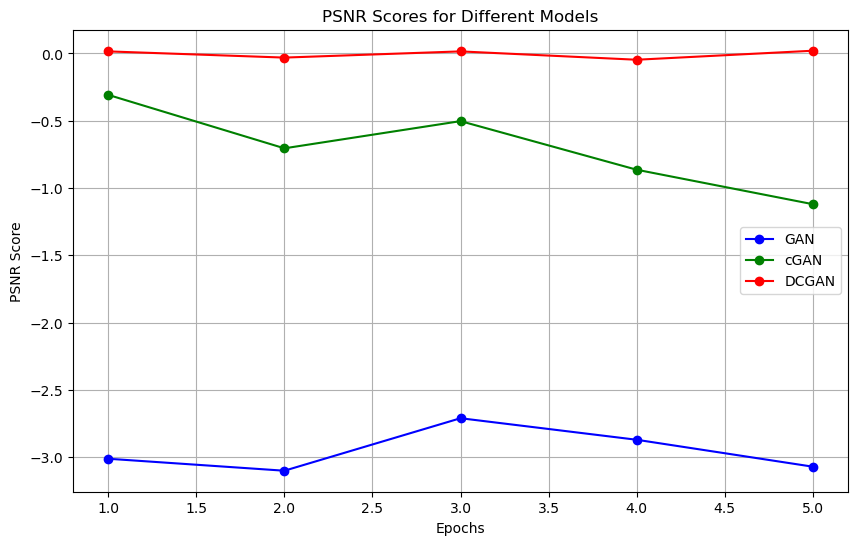

In [30]:
import matplotlib.pyplot as plt

# PSNR scores for three different models
psnr_values_model1 = [-3.011,-3.10,-2.71,-2.87,-3.07]  # PSNR scores for Model 1
psnr_values_model2 = [-0.308,-0.705,-0.503,-0.864,-1.12]  # PSNR scores for Model 2
psnr_values_model3 = [0.015,-0.031,0.015,-0.047,0.02]  # PSNR scores for Model 3
epochs = [1,2,3,4,5]  # Example epochs

# Plotting PSNR scores for three models in a line graph
plt.figure(figsize=(10, 6))

# Plot PSNR scores for Model 1
plt.plot(epochs, psnr_values_model1, marker='o', color='blue', label='GAN')

# Plot PSNR scores for Model 2
plt.plot(epochs, psnr_values_model2, marker='o', color='green', label='cGAN')

# Plot PSNR scores for Model 3
plt.plot(epochs, psnr_values_model3, marker='o', color='red', label='DCGAN')

plt.xlabel('Epochs')
plt.ylabel('PSNR Score')
plt.title('PSNR Scores for Different Models')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
import matplotlib.pyplot as plt

models = ['GAN', 'cGAN', 'DCGAN']

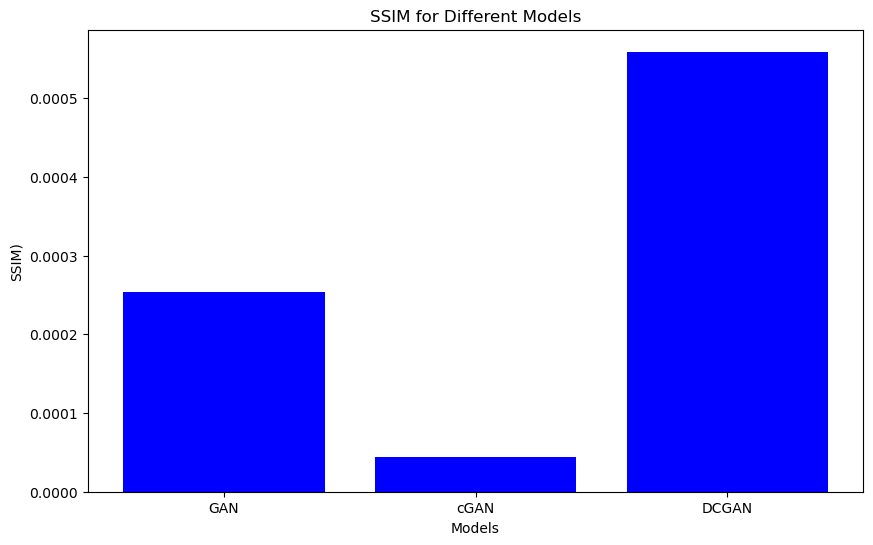

In [16]:
ssim_values = [-ssim_score1,ssim_score2,ssim_score3]
plt.figure(figsize=(10, 6))
plt.bar(models, ssim_values, color='blue')
plt.xlabel('Models')
plt.ylabel('SSIM)')
plt.title('SSIM for Different Models')
plt.show()
